## Частотные методы обработки изображений

<a href="https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html">Reference1</a>

<img src='http://scikit-image.org/docs/dev/_images/sphx_glr_plot_equalize_001.png'/>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib notebook

In [2]:
def rescaleImage(img,S=256):
    """ make all the values in the image in the scale 0..S, so could be fit within uint 
        input:
        -------------
          img : numpy array
          S   : scale parameter
        return 
          numpy array after rescaling the image
    """
    assert S<=256
    ret=np.zeros(img.shape)
    ret=S*((img-img.min())/float(1+img.max()-img.min()))
    return np.uint8(ret)
def negativeImage(img):
    """return negative of the image"""
    return 255-img
def adjust_gamma(img, gamma=1.0):
    """Gamma Correction
        input:
        ---------------
            img   : numpy array
            gamma : Gamma correction parameter
        
        output: return numpy array after applying Gamma correction
    """
    invGamma=1/gamma
    ret=img.copy()
    ret=ret/256.
    return np.uint8(256*(np.power(ret,invGamma)))

In [3]:
def mapCell(nh,nw,oh,ow,i,j):
    """ map (i,j)-->(oi,oj)
    Input:
    ---------------
        nh,nw: New dimensions of the image
        oh,ow: Origin/old dimensions of the image
        i,j  : coordinates of the cell in the new image
    return:
    -----------------
        (oi,oj): the corresponding coordinates in the origin image
    """
    return int(i*oh/float(nh)),int(j*ow/float(nw))
def resizeImage_NN(img,nh,nw,oh,ow):
    """ Resize image using 1-Nearest Neighbor Algorithm
        Input:
        --------------
            img: numpy array of shape (h,w) or (h,w,3)
            nh,nw: New dimensions of the image
            oh,ow: Origin/old dimensions of the image
        return numpy array with values of type uint, represents the image in the new dimensions
    """
    newdims=[nh,nw]+list(img.shape[2:])  # if the image RGB then add the third dimension (will be 3)
    newimg=np.zeros(tuple(newdims))
    for i in range(nh):
        for j in range(nw):
            ix,jx=mapCell(nh,nw,oh,ow,i,j)
            newimg[i,j]=img[ix,jx]
    return np.uint8(newimg)

In [4]:
def getHistogram(img,mx):
    return np.array([np.sum(img==i) for i in range(mx+1)])
def getCumSum(img,mx):
    return np.cumsum(getHistogram(img,mx))
def getNormalizedHistogram(img,mx,L):
    hist=getHistogram(img,mx)
    return np.round(L*((hist-hist.min())/(hist.max()-hist.min()+1.)))
def getNormalizedCumSum(img,mx,L):
    CDF=getCumSum(img,mx)
    return np.round(L*((CDF-CDF.min())/(CDF.max()-CDF.min()+1.)))
def equalizeImage1Channel(img):
    histogram=getHistogram(img,255)
    CDF=np.cumsum(histogram)
    histogram_normalized=getNormalizedHistogram(img,255,255)
    CDF_normalized=getNormalizedCumSum(jpgfile1,255,255)
    
    newImg=CDF_normalized[img]
    newHistogram=getHistogram(newImg,255)
    newCDF=getCumSum(newImg,255)
    newHistogram_normalized=getNormalizedHistogram(newImg,255,255)
    newCDF_normalized=getNormalizedCumSum(newImg,255,255)
    
    ret={"histogram":histogram,"CDF":CDF,"histogram_normalized":histogram_normalized,"CDF_normalized":CDF_normalized,
         "newHistogram":newHistogram,"newCDF":newCDF,"newHistogram_normalized":newHistogram_normalized,
         "newCDF_noramlized":newCDF_normalized}
    return newImg,ret
def equalizeImageRGB(img):
    newImg=np.zeros_like(img)
    newImg[:,:,0],ret1=equalizeImage1Channel(img[:,:,0])
    newImg[:,:,1],ret2=equalizeImage1Channel(img[:,:,0])
    newImg[:,:,2],ret3=equalizeImage1Channel(img[:,:,0])
    return newImg,[ret1,ret2,ret3]

<IPython.core.display.Javascript object>


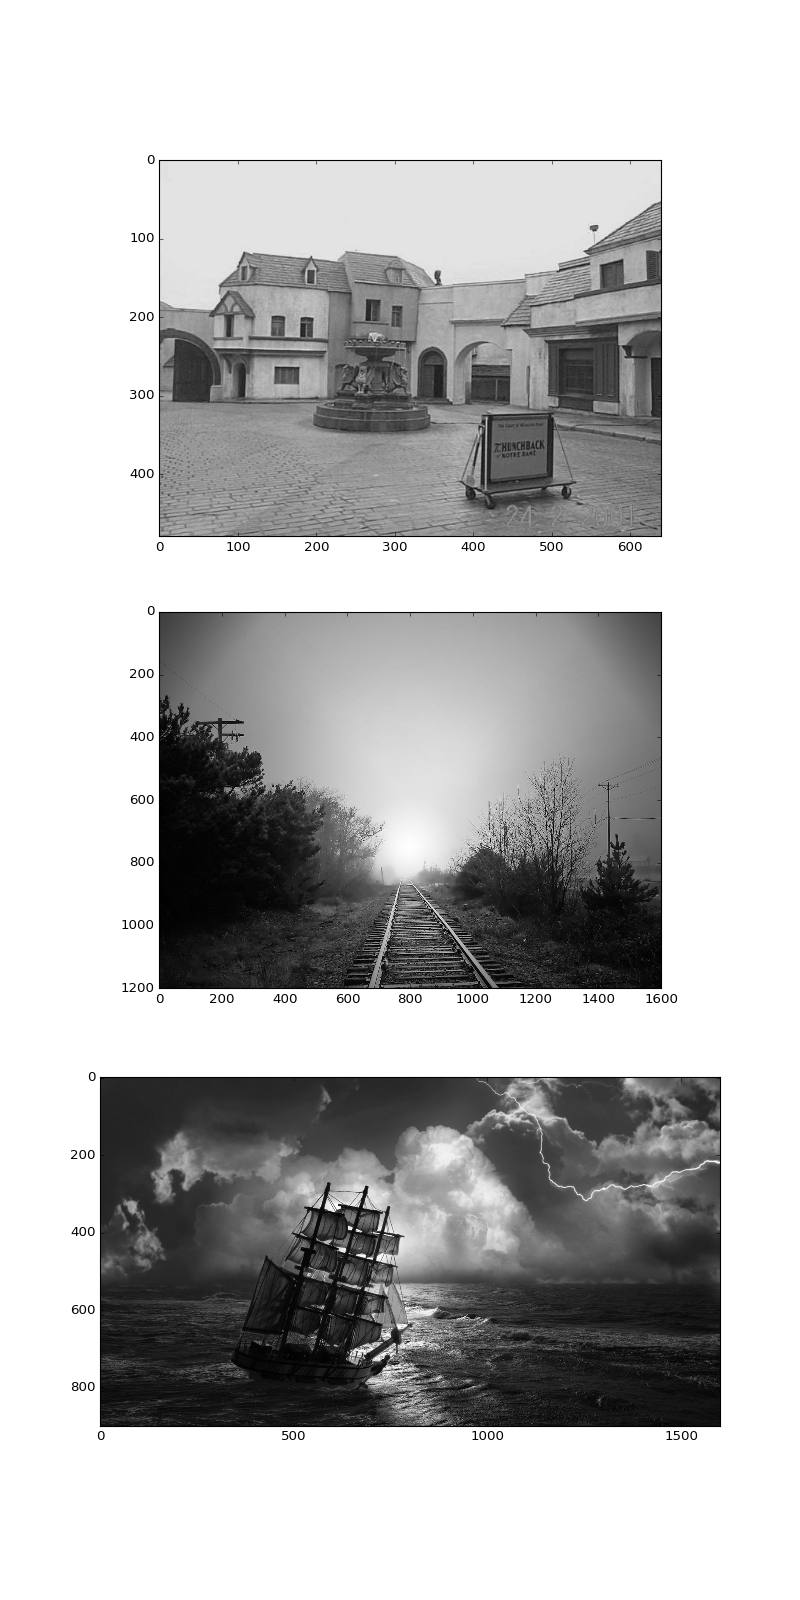

(900, 1601, 3)


In [5]:
from PIL import Image
jpgfile1 = Image.open("./data/HollywoodLC.jpg")
jpgfile2 = Image.open("./data/photo1.jpg")
jpgfile3 = Image.open("./data/photo2.jpg")
jpgfile1 = np.array(jpgfile1)
jpgfile2 = np.array(jpgfile2)
jpgfile3 = np.array(jpgfile3)

plt.figure(1,figsize=(10,20))
plt.subplot(3,1,1)
imshow(jpgfile1,cmap='gray')
plt.subplot(3,1,2)
imshow(jpgfile2)
plt.subplot(3,1,3)
imshow(jpgfile3)

print jpgfile3.shape

In [6]:
histogram=getHistogram(jpgfile1,255)
CDF=np.cumsum(histogram)
histogram_normalized=getNormalizedHistogram(jpgfile1,255,255)
CDF_normalized=getNormalizedCumSum(jpgfile1,255,255)

<IPython.core.display.Javascript object>


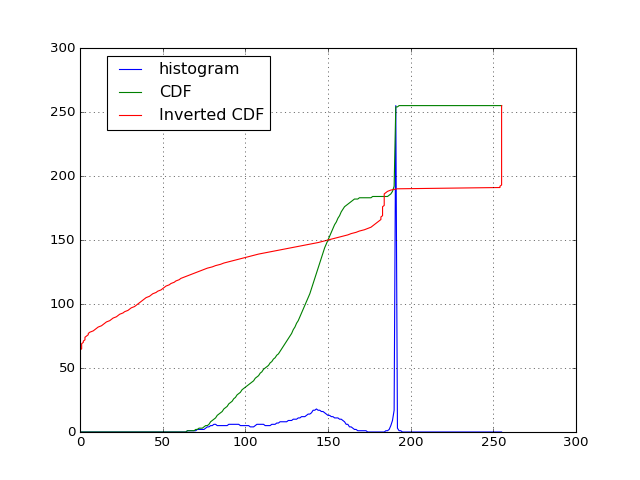

In [7]:
plt.figure()
plt.plot(histogram_normalized)
plt.plot(CDF_normalized)
plt.plot(CDF_normalized,range(256))
plt.legend(['histogram','CDF','Inverted CDF'],bbox_to_anchor=(0.4, 1))
plt.grid()

In [8]:
newImg=CDF_normalized[jpgfile1]
newHistogram=getHistogram(newImg,255)
newCDF=getCumSum(newImg,255)
newHistogram_normalized=getNormalizedHistogram(newImg,255,255)
newCDF_normalized=getNormalizedCumSum(newImg,255,255)

<IPython.core.display.Javascript object>


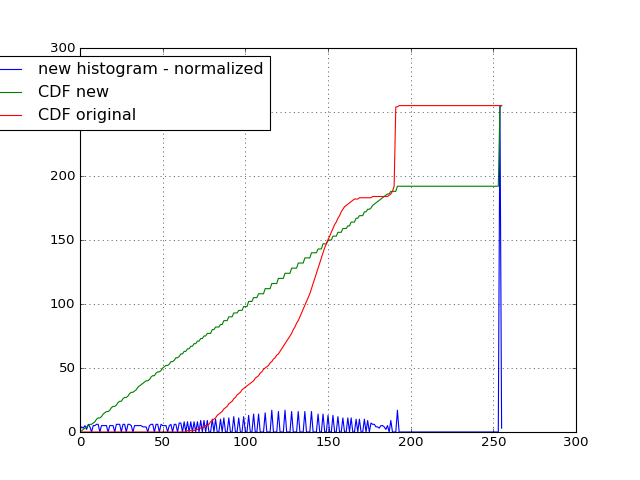

In [9]:
plt.figure()
plt.plot(newHistogram_normalized)
plt.plot(newCDF_normalized)
plt.plot(CDF_normalized)
plt.legend(['new histogram - normalized','CDF new','CDF original'],bbox_to_anchor=(0.4, 1))
plt.grid()

<IPython.core.display.Javascript object>


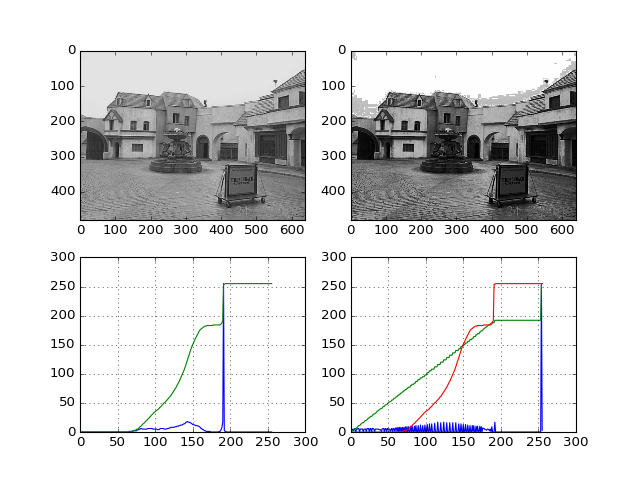

In [10]:
plt.figure()
plt.subplot(2,2,1)
imshow(jpgfile1,cmap='gray')
plt.subplot(2,2,2)
imshow(newImg,cmap='gray')
plt.subplot(2,2,3)
plt.plot(histogram_normalized)
plt.plot(CDF_normalized)

plt.grid()
plt.subplot(2,2,4)
plt.plot(newHistogram_normalized)
plt.plot(newCDF_normalized)
plt.plot(CDF_normalized)
plt.grid()

In [11]:
newimg2,ret2=equalizeImageRGB(jpgfile2)

<IPython.core.display.Javascript object>


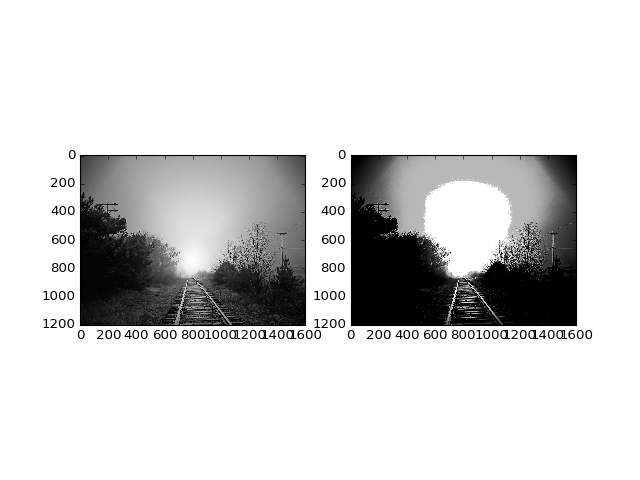

In [12]:
plt.figure()
plt.subplot(1,2,1)
imshow(jpgfile2)
plt.subplot(1,2,2)
imshow(newimg2)

In [13]:
newimg3,ret3=equalizeImageRGB(jpgfile3)

<IPython.core.display.Javascript object>


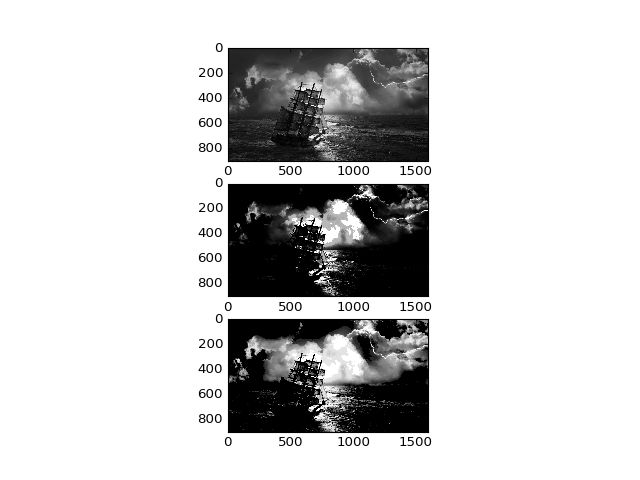

In [14]:
plt.figure()
plt.subplot(3,1,1)
imshow(jpgfile3)
plt.subplot(3,1,2)
imshow(newimg3)
plt.subplot(3,1,3)
imshow(adjust_gamma(newimg3,3.0))